<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Feature Engineering</h2>
<h4>DAT-5390 | Computational Analytics with Python</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Team: 5

In [1]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
import warnings                       # warnings



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# suppressing warnings
warnings.filterwarnings(action = 'ignore')


# specifying file path
file = "C:/Users/yasca/Downloads/hw_feature_engineering.xlsx"


# reading the file into Python
housing = pd.read_excel(io     = file,
                        header = 0   )


# code will not produce an output
housing.head()

,property_id,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Area,Porch_Area,Overall_Qual,Overall_Cond,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Sale_Price,log_Sale_Price
0,1,31770,112,1080,1656,0,1656,528,272,6,5,1,0,1,7,2,2,215000,12.278398
1,2,11622,0,882,896,0,896,730,260,5,6,1,0,1,5,0,1,105000,11.561725
2,3,14267,108,1329,1329,0,1329,312,429,6,6,1,1,1,6,0,1,172000,12.055256
3,4,11160,0,2110,2110,0,2110,522,0,7,5,2,1,1,8,2,2,244000,12.404928
4,5,13830,0,928,928,701,1629,482,246,5,5,2,1,1,6,1,2,189900,12.154258


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Step 1: Hypothesize on Features to Engineer</h3><br>
<strong>a)</strong> Write a hypothesis on the effect you believe each new feature will have on the response variable (strong positive correlation, etc.). You may choose to hypothesize on either <em>Sale_Price</em> or <em>log_Sale_Price</em> (you will test your engineered features on both). (minimum 3 sentences per feature)
<br><br>
<strong>b)</strong> Give a practical, real world explanation as to why you feel each new feature adds value. (minimum of 2 sentences per feature)

<em>Answers Step 1.</em></br>
 <strong>a)</strong> We decided to work with:<strong>outdoors area</strong>, <strong>quality categories</strong> and <strong>storage space</strong>. We believe that each feature will perform differently but with a meaningful impact on the Sale Price. <br>

   First, the outdoors area, we believe that having outdoors area available will increase the property's value at certain point. In other words we expect to see a positive strong correlation of the feature in Sale_Price until it reaches a specific value were it might not be that interesting anymore. Our plan is combine the features about constructed areas to reach the total amount of constructed areas and subtract that from the lot area.
   
   Second, the qualities category, we believe that the high and medium qualities will impact positively on sales price, while low quality will impact negatively. It is expected to see a strong positive correlation with high, a moderate positive correlation with medium and a strong negative correlation with low. Our plan is separate the quality into 3 categories and evaluate their performance individually.
   
   Third, the storage area, we believe that having more storage area available will increase the property's price. To build this feature we plan to sum garage and basement area to understand the total amount of storage area. We believe that the correlation between the available storage area will have a strong positive correlation with Sale Price
   
<strong>b)</strong> Real World examples:</br>
Feature 1. Outdoors Area: Outdoors Area refers to an area in the lot that has not been taking by construction, so it is available for usage. The owner of the property can use it as a garden, a play-ground, a pool area, or a pet's area or however he wants. According to Illustrarch(2024)."This is important for homeowners because it decreases stress levels, promotes exercise, and offers an area to relax and clear one’s mind. Such health and environmental gains are being sought more and more by buyers especially those living in urban areas where they may be unable to comfortably access green areas." So, having more space available makes the property pretty, increases life quality and opens more possibilities to the owners.

Feature 2. Quality Categories: Having a property with good quality means that your house is well build, the amenities are balanced, every essential area is present, etc. So we believe that houses with a better hanking will have higher prices since this is something related to the building it self, it's structure.According to Home Design Institute (2023): "Home design profoundly influences property value, intertwining aesthetics, function, economics, and market trends. The delicate balance between these factors shapes the appeal and financial worth of a property".In other words, a well planned and structured building is more likely to have a higher price if compared with a building that doesn't meet this requirements.

Feature 3. Storage Space: Obviously storage space is important for big or older families that have many objects to take care of, but storage space goes beyond that because it means available space in a build area. According to Farrell Heyworth Sales and Lettings (2021)"Sellers with storage space that is tailored to their target market can potentially achieve higher asking prices (Marco, E. 2022). This is because during the property viewing the house can be pitched in a way that matches their target buyers' lifestyle.". So having more space available might be good not only for families but also for pet owners, people with hobbies, cars, etc. 




<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 2: Code the New Features</h3><br>
Use the code cells below to develop your new features.

#### Feature 1

In [2]:
## Feature 1 ##
# Outdoors feature: lot_area

# Trying to understand what is the properly Gross Living Area, 
#to discount from the Lot Area and discover just the Outdoors Area:

# Dealing with two posibilities:

# 1 Gr_Liv_Area equals the sum of First_Flr_SF and Second_Flr_SF
housing['Gr_x_Floors_Sum'] = housing['Gr_Liv_Area'] - (housing['First_Flr_SF'] + housing['Second_Flr_SF'])

# 2 Gr_Liv_Area equals the sum of First_Flr_SF, Mas_Vnr_Area, Porch_Area and Garage_Area.
#Excluding Second Floor and Basement
housing['GR_x_All_Less_Bsmt_Second'] = housing['Gr_Liv_Area'] - (housing['First_Flr_SF'] + housing['Mas_Vnr_Area'] + housing['Porch_Area'] + housing['Garage_Area'])

# We found a rule of Gr_Liv_Area = First_Flr_SF + Second_Flr_SF, but we found 37 observations 
#that don't follow this rule

housing_false = housing.loc[housing['Gr_x_Floors_Sum'] != 0]

# Show that we found 37 different observations

housing_false.info()


<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 177 to 2852
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   property_id                37 non-null     int64  
 1   Lot_Area                   37 non-null     int64  
 2   Mas_Vnr_Area               37 non-null     int64  
 3   Total_Bsmt_SF              37 non-null     int64  
 4   First_Flr_SF               37 non-null     int64  
 5   Second_Flr_SF              37 non-null     int64  
 6   Gr_Liv_Area                37 non-null     int64  
 7   Garage_Area                37 non-null     int64  
 8   Porch_Area                 37 non-null     int64  
 9   Overall_Qual               37 non-null     int64  
 10  Overall_Cond               37 non-null     int64  
 11  Full_Bath                  37 non-null     int64  
 12  Half_Bath                  37 non-null     int64  
 13  Kitchen_AbvGr              37 non-null     int64  
 1

In [3]:
# Testing the two possibilities:

housing_false[['Gr_x_Floors_Sum', 'GR_x_All_Less_Bsmt_Second']].describe()

,Gr_x_Floors_Sum,GR_x_All_Less_Bsmt_Second
count,37.000000,37.000000
mean,359.486486,254.756757
std,204.036029,489.585108
min,80.000000,-369.000000
25%,205.000000,-54.000000
50%,384.000000,104.000000
75%,479.000000,389.000000
max,1064.000000,1845.000000


In [4]:
# create the new feature Outside_Area, using Lot_Area less just the First_Flr_SF.
#We decided for this, because the Second_Flr_SF will not impact in the external area of the building

housing['Outdoors_Area_SF'] = housing['Lot_Area'] - housing['First_Flr_SF']


<br>

#### Feature 2

In [5]:
## Feature 2 ##
# Categorical Score - Quality
# Creating dummy columns with categories to see how each category interacts with sales price
overall_qual_dummy = pd.get_dummies(housing['Overall_Qual'])

# Creating and naming the categories columns by summing the correspondent categories
overall_qual_dummy['Low'] = overall_qual_dummy[[1, 2, 3, 4]].sum(axis=1)
overall_qual_dummy['Medium'] = overall_qual_dummy[[5, 6, 7]].sum(axis=1)
overall_qual_dummy['High'] = overall_qual_dummy[[ 8, 9, 10]].sum(axis=1)

#Dropping the dummy columns
overall_qual_dummy  = overall_qual_dummy.drop([1,2,3,4,5,6,7,8,9,10], axis=1)

#sorting values to check if everything is behaving as expected
overall_qual_dummy.sort_values(by='High', ascending = False)

# Joining housing and the new DataFrame created
housing_quality_cat = pd.concat([housing, overall_qual_dummy], axis=1)
#Dropping overal Quality so it don't impact in out correlation
housing_quality_cat = housing_quality_cat.drop(['Overall_Qual','property_id', 'Garage_Area', 'Garage_Cars', 'Gr_Liv_Area', 'Total_Bsmt_SF'], axis=1)

#checking the name of the columns
housing_quality_cat.columns


Index(['Lot_Area', 'Mas_Vnr_Area', 'First_Flr_SF', 'Second_Flr_SF', 'Porch_Area', 'Overall_Cond', 'Full_Bath', 'Half_Bath', 'Kitchen_AbvGr', 'TotRms_AbvGr', 'Fireplaces', 'Sale_Price', 'log_Sale_Price', 'Gr_x_Floors_Sum', 'GR_x_All_Less_Bsmt_Second', 'Outdoors_Area_SF', 'Low', 'Medium', 'High'], dtype='object')

In [6]:
#Runing a correlation to understand how each of the categories interact with sales price
correlation_housing_qual = housing_quality_cat.corr(method='pearson').round(2)

# Selecting the part of the correlation's table that is most interesting to me
correlation_housing_qual.loc[['Low', 'Medium', 'High'], ['Sale_Price']]

,Sale_Price
Low,-0.33
Medium,-0.36
High,0.69


In [7]:
#Runing a regression in the dummies table taking 'Low' of since they are all related and avoiding multicoliniarity 
regression_housing = smf.ols(formula = """Sale_Price ~ 
                                                       Medium +
                                                       High""",
                data = correlation_housing_qual)

results = regression_housing.fit()

#Showing the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     92.83
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           1.57e-09
Time:                        20:21:25   Log-Likelihood:                 14.559
No. Observations:                  19   AIC:                            -23.12
Df Residuals:                      16   BIC:                            -20.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1048      0.031      3.362      0.004       0.039       0.171
Medium         0.6136      0.141      4.343      0.001       0.314       0.913
High           1.3876      0.125     11.095      0.000       1.123       1.653
==============================================================================
Omnibus:                       11.668   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.121
Skew:                          -1.352   Prob(JB):                       0.0105
Kurtosis:                       5.052   Cond. No.                         6.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#Adding the new features into the dataset

housing['High'] = housing_quality_cat['High']
housing['Medium'] = housing_quality_cat['Medium']
housing['Low'] = housing_quality_cat['Low']

housing.head()

,property_id,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Area,Porch_Area,Overall_Qual,Overall_Cond,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Sale_Price,log_Sale_Price,Gr_x_Floors_Sum,GR_x_All_Less_Bsmt_Second,Outdoors_Area_SF,High,Medium,Low
0,1,31770,112,1080,1656,0,1656,528,272,6,5,1,0,1,7,2,2,215000,12.278398,0,-912,30114,0,1,0
1,2,11622,0,882,896,0,896,730,260,5,6,1,0,1,5,0,1,105000,11.561725,0,-990,10726,0,1,0
2,3,14267,108,1329,1329,0,1329,312,429,6,6,1,1,1,6,0,1,172000,12.055256,0,-849,12938,0,1,0
3,4,11160,0,2110,2110,0,2110,522,0,7,5,2,1,1,8,2,2,244000,12.404928,0,-522,9050,0,1,0
4,5,13830,0,928,928,701,1629,482,246,5,5,2,1,1,6,1,2,189900,12.154258,0,-27,12902,0,1,0


<br>

#### Feature 3

In [9]:
## Feature 3 ##

# Storage

housing['storage_area_SF'] = housing['Total_Bsmt_SF'] + (housing['Garage_Area'])

# This code will not produce any output

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 3: Check the Results</h3><br>
Develop scatterplots and a correlation matrix or a heatmap to show the linear relationships between your three new features and the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>).

#### Feature 1

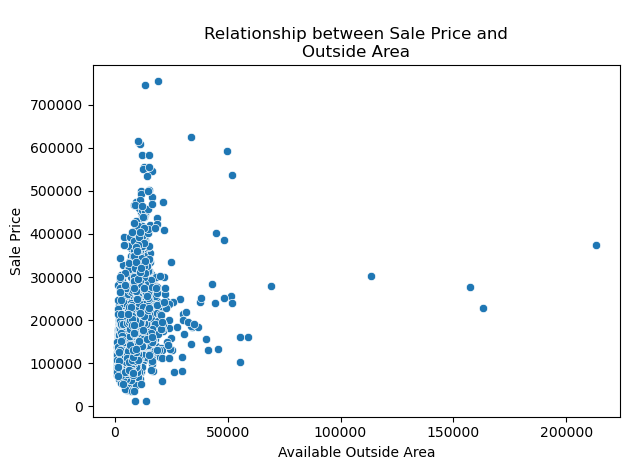

In [12]:
## Scatterplot - Feature 1(Outside) ##

# scatterplot -  Outside_Area_SF and Sale_Price
sns.scatterplot(x    = 'Outdoors_Area_SF',
                y    = 'Sale_Price' ,
                data = housing)



# titles and axis labels
plt.title(label   = """
Relationship between Sale Price and
Outside Area""")
plt.xlabel(xlabel = 'Available Outdoors Area')
plt.ylabel(ylabel = 'Sale Price')
plt.tight_layout()


# displaying the plot
plt.show()

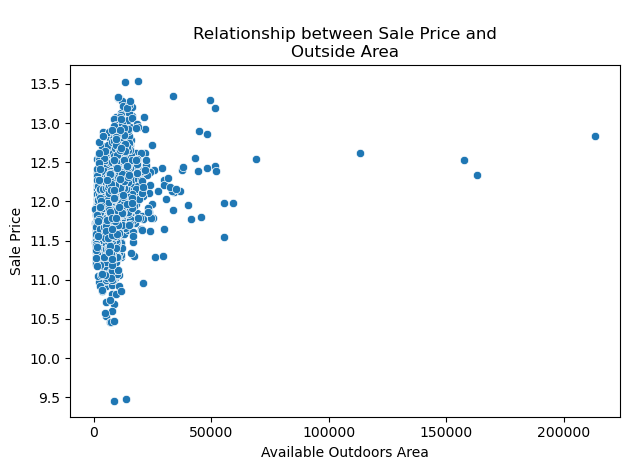

In [24]:
## Scatterplot - Feature 1(Outside) ##

# scatterplot -  Outside_Area_SF and Sale_Price
sns.scatterplot(x    = 'Outdoors_Area_SF',
                y    = 'log_Sale_Price' ,
                data = housing)



# titles and axis labels
plt.title(label   = """
Relationship between log_Sale_Price and
Outside Area""")
plt.xlabel(xlabel = 'Available Outdoors Area')
plt.ylabel(ylabel = 'log_Sale_Price')
plt.tight_layout()


# displaying the plot
plt.show()

<br>

#### Feature 2

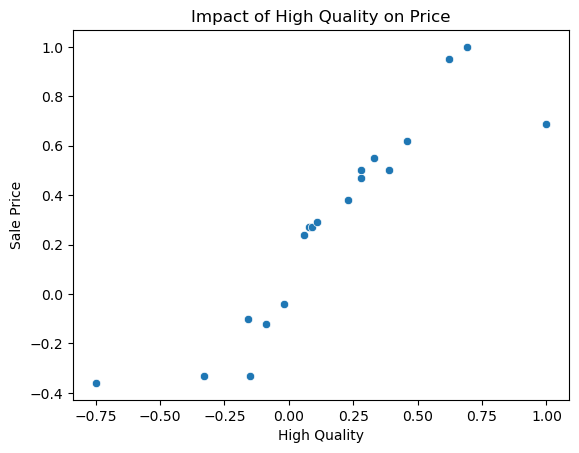

In [13]:
## Scatterplot - Feature 2 ##

# scatterplot
sns.scatterplot(x    = 'High',
                y    = 'Sale_Price' ,
                data = correlation_housing_qual)


# titles and axis labels
plt.title(label   = 'Impact of High Quality on Price')
plt.xlabel(xlabel = 'High Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()


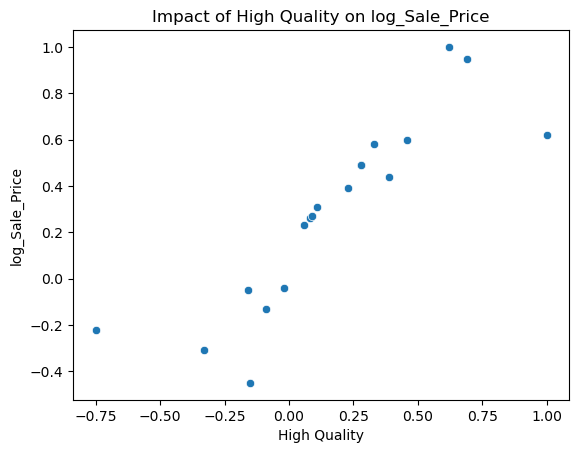

In [26]:
## Scatterplot - Feature 2 ##

# scatterplot
sns.scatterplot(x    = 'High',
                y    = 'log_Sale_Price' ,
                data = correlation_housing_qual)


# titles and axis labels
plt.title(label   = 'Impact of High Quality on log_Sale_Price')
plt.xlabel(xlabel = 'High Quality')
plt.ylabel(ylabel = 'log_Sale_Price')


# displaying the plot
plt.show()

######

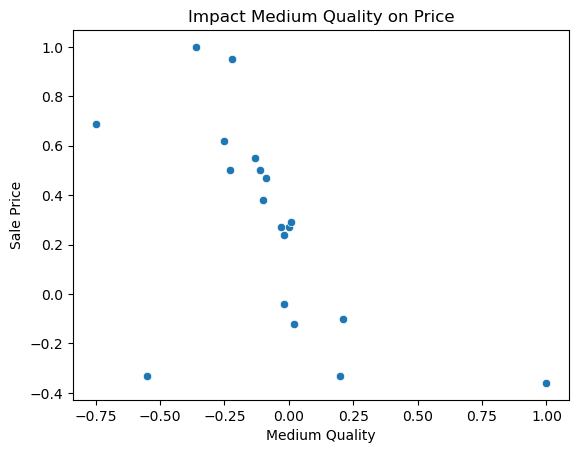

In [28]:
# scatterplot
sns.scatterplot(x    = 'Medium',
                y    = 'Sale_Price' ,
                data = correlation_housing_qual)


# titles and axis labels
plt.title(label   = 'Impact Medium Quality on Price')
plt.xlabel(xlabel = 'Medium Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()


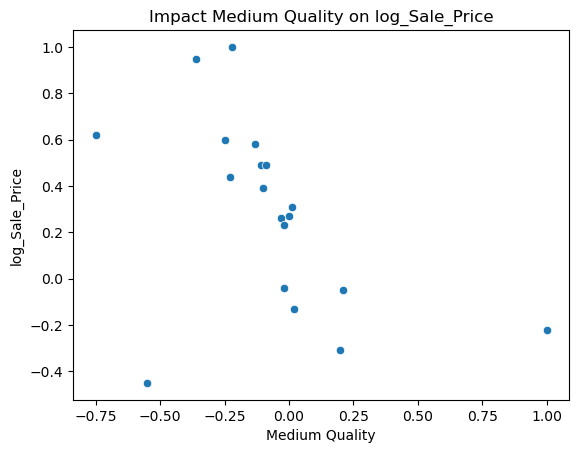

In [29]:
# scatterplot
sns.scatterplot(x    = 'Medium',
                y    = 'log_Sale_Price' ,
                data = correlation_housing_qual)


# titles and axis labels
plt.title(label   = 'Impact Medium Quality on log_Sale_Price')
plt.xlabel(xlabel = 'Medium Quality')
plt.ylabel(ylabel = 'log_Sale_Price')


# displaying the plot
plt.show()


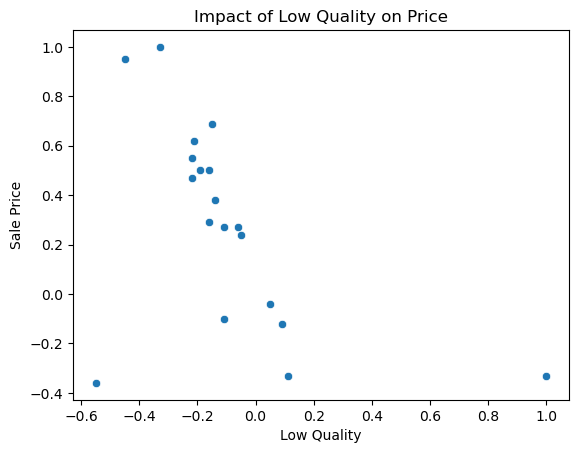

In [15]:
# scatterplot
sns.scatterplot(x    = 'Low',
                y    = 'Sale_Price' ,
                data = correlation_housing_qual)


# titles and axis labels
plt.title(label   = 'Impact of Low Quality on Price')
plt.xlabel(xlabel = 'Low Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()


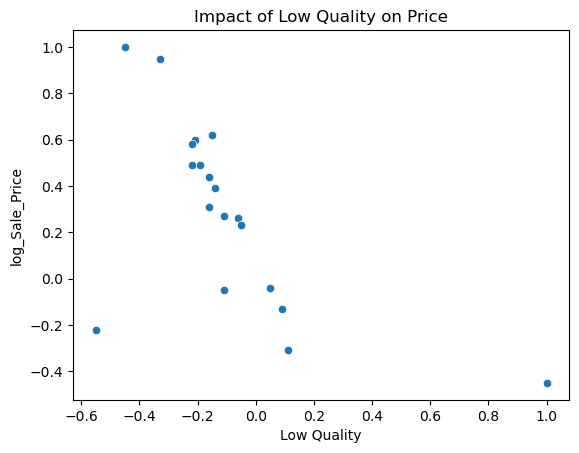

In [30]:
# scatterplot
sns.scatterplot(x    = 'Low',
                y    = 'log_Sale_Price' ,
                data = correlation_housing_qual)


# titles and axis labels
plt.title(label   = 'Impact of Low Quality on Price')
plt.xlabel(xlabel = 'Low Quality')
plt.ylabel(ylabel = 'log_Sale_Price')


# displaying the plot
plt.show()


<br>

#### Feature 3

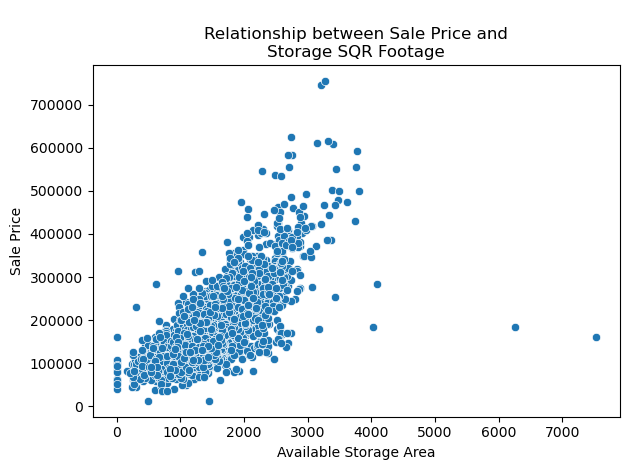

In [16]:
## Scatterplot - Feature 3(Storage) ##

# scatterplot -  Storage and sale price
sns.scatterplot(x    = 'storage_area_SF',
                y    = 'Sale_Price' ,
                data = housing)



# titles and axis labels
plt.title(label   = """
Relationship between Sale Price and
Storage SQR Footage""")
plt.xlabel(xlabel = 'Available Storage Area')
plt.ylabel(ylabel = 'Sale Price')
plt.tight_layout()


# displaying the plot
plt.show()

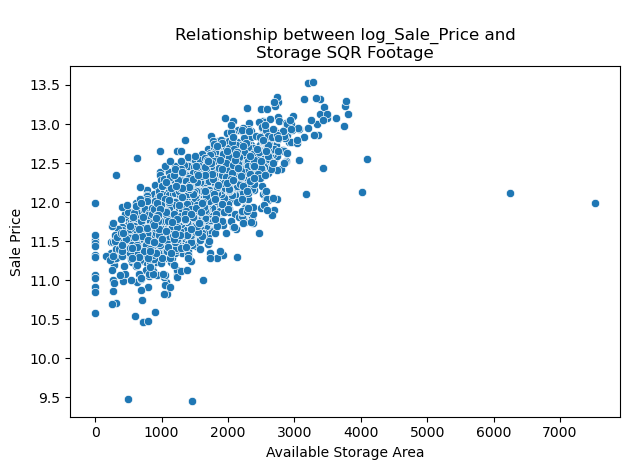

In [23]:
## Scatterplot - Feature 3(Storage) ##

# scatterplot -  Storage and sale price
sns.scatterplot(x    = 'storage_area_SF',
                y    = 'log_Sale_Price' ,
                data = housing)



# titles and axis labels
plt.title(label   = """
Relationship between log_Sale_Price and
Storage SQR Footage""")
plt.xlabel(xlabel = 'Available Storage Area')
plt.ylabel(ylabel = 'Sale Price')
plt.tight_layout()


# displaying the plot
plt.show()

#### Correlations and Heatmaps


<br>

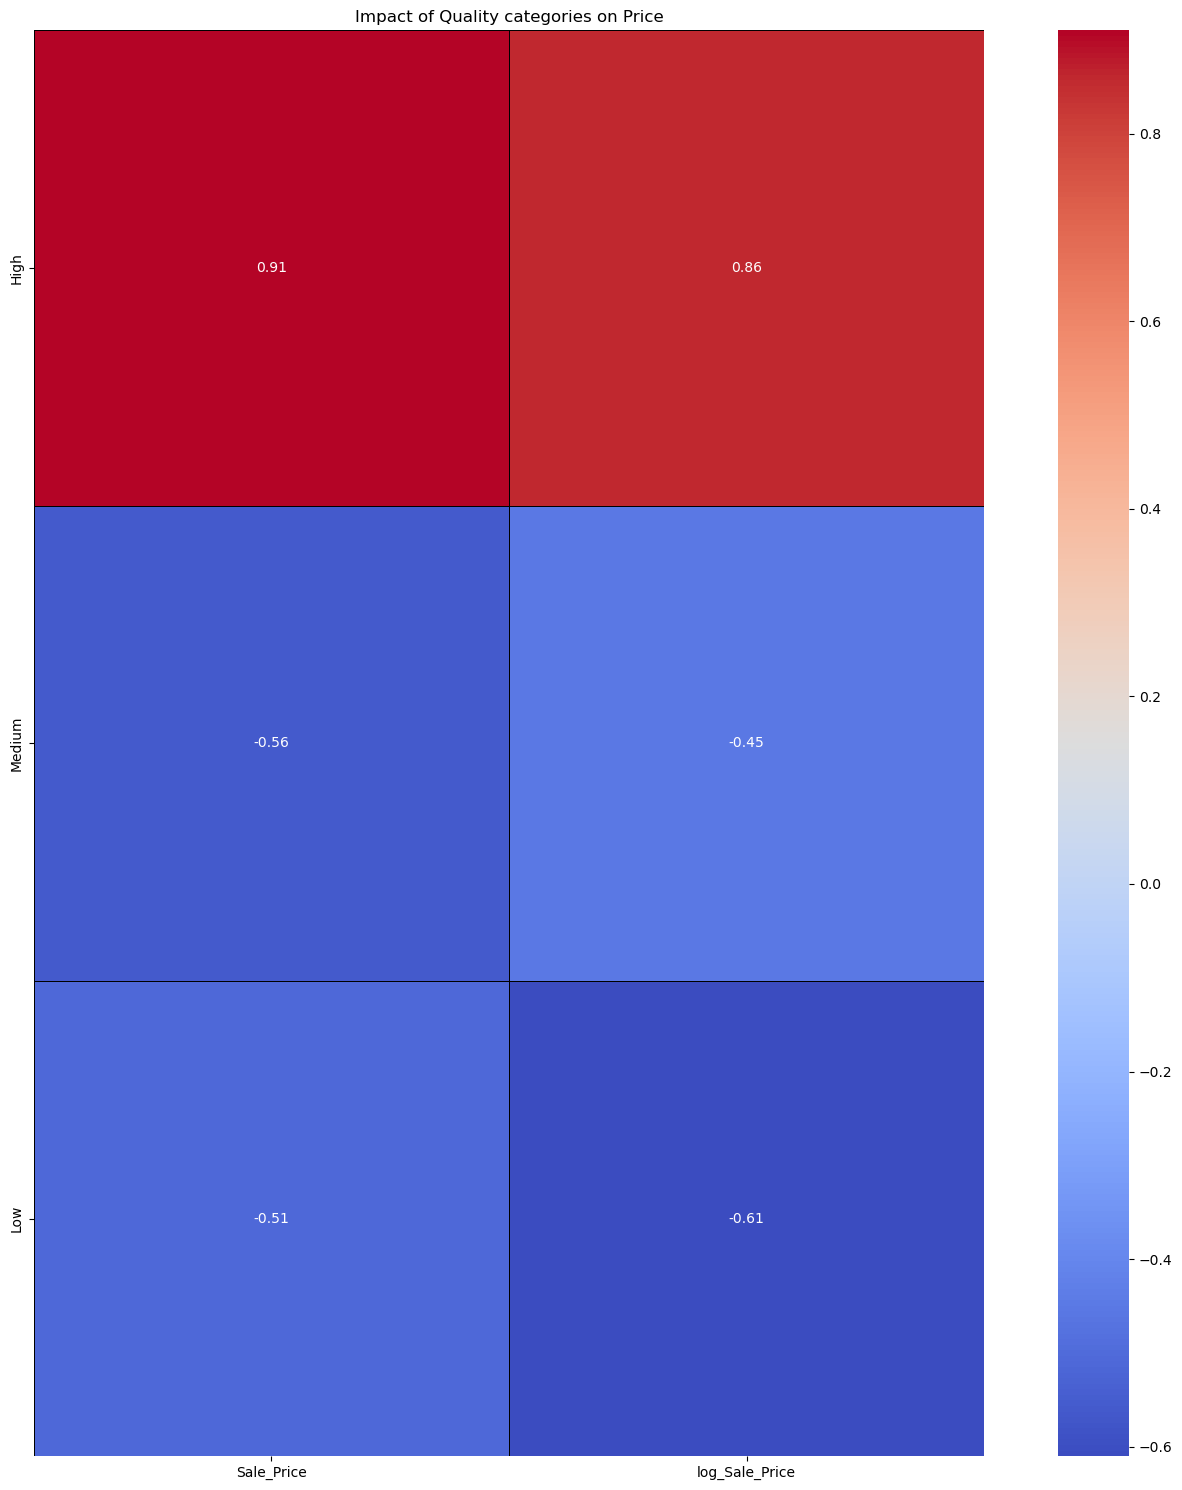

In [18]:

#Heatmap feature 2
# instantiating a correlation matrix
housing_quality_corr = correlation_housing_qual.corr().round(2)


# setting figure size
fig, ax = plt.subplots(figsize=(15,15))


# visualizing the correlation matrix
sns.heatmap(housing_quality_corr.loc[['High','Medium', 'Low'],['Sale_Price','log_Sale_Price']],
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# layout and rendering
plt.title(label ='Impact of Quality categories on Price')
plt.tight_layout()
plt.show()

In [20]:
## Correlation feature 3  ##
df_corr = housing.corr(method = 'pearson').round(2)

df_corr.loc[ ['Outdoors_Area_SF', 'storage_area_SF'] , ['Sale_Price', 'log_Sale_Price'] ].sort_values(by = 'Sale_Price',
                                                                ascending = False)



,Sale_Price,log_Sale_Price
storage_area_SF,0.72,0.72
Outdoors_Area_SF,0.24,0.23


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4: Explain the Results</h3><br>
<strong>a)</strong> Did each engineered feature perform as expected? Why or why not? (minimum of 2 sentences per engineered feature)
<br><br>
<strong>b)</strong> What practical idea(s) do you have to help each engineered feature have a stronger linear relationship with either of the response variables? Do not write about collecting more data or performing transformations. (minimum of 3 sentences per engineered feature)

<em>Use this markdown cell for Step 4.</em></br>
<strong>a)</strong> Not all the engineered features performed as expected.
Feature 1. Outdoors Area: We believe that outdoors area didn't perform as expected for two reasons: the presence of outliars and also the fact that probably having a lot of outdoors area is good in small amounts. In other words, having too much available space might not be an advantage to the building. This can be due to the fact that it might consume a lot of work or money to take care of outdoors or the fact that it is not only about the amount of outdoor area, but also about its condition: 

"One of the most effective ways to enhance the value of your property is through thoughtful landscaping. A well-designed and maintained outdoor space not only boosts your home’s curb appeal but can also significantly increase its market value." M&D Real Estate

Feature 2. Quality Categories: Only one of the three features created here didn't performed as expected, medium quality. High quality had a strong positive relation with Sale Price and Low quality also had a negative relation with Sale Price (although not strong as we predicted), in the other hand Medium quality had a negative relation with sale price, which indicates that if your property is not in the high quality range, it will probably reflect on the sale price.

Feature 3. Storage Space: Storage space demonstrated a strong correlation with both Sale and log Sale Price, but when plotted with Sale Price, it presented a curve. When plotted with log sale price, in the other hand, it showed a linear ascending trend. So we believe that our first assumption was correct, having available space inside the building area brings value to the property.</br>

<strong>b)</strong> 
Feature 1. Outdoors Area: For this feature we used outdoors area equals to the difference between lot area and first floor because, for the majority of the observations, the gross living area was the sum of first floor and second floor. This indicates that the first floor contains all the other construction features within it self (porch, garage, masonry veneer), however 37 observations didn't have the gross living area equals the sum of first and second floor. We tried different combinations to find the right one for the 37 cases, but we couldn't find one single perfect answer. So one possibility is trying to treat every single case individually trying to minimize the difference between the sum of floors and the gross living area by adding and subtracting values from the other features.

Feature 2. Quality Categories: We believe that maybe all of this features could improve upon trying different combinations of scores to create the features. So instead of using from 1 to 4 to form the low category, maybe the relationship would be stronger if this category contained also the number 5 for example. Maybe recording the correlation's results of each change, it would be possible to reach the best combination.

Feature 3. Storage Space: Although this feature have performed as expected, specially with log_sale_price, we believe that the usage of cross validation could be a good idea in this case. Cross validation would test different possibilities and coefficients for trend lines to understand which one is better applicable in this case. So it would be able to give an more accurate linear trend between all the points in this feature.


<strong>Bibliography</strong></br> 
None AI was used in this work

Marco, E. (2022). Stuff and space in the home: space for storage as the forgotten design and well-being dimension in standardised housing. The Journal of Architecture, 27(5–6), 708–733. https://doi.org/10.1080/13602365.2022.2142269

Marco, E., Williams, K., & Oliveira, S. (2021). Prioritising storage practices: a new approach to housing design thinking. Interiority, 4(2), 223-248. https://doi.org/10.7454/in.v4i2.104

M&D Real Estate. (n.d.). Outdoor improvements to increase home value. M&D Real Estate. Retrieved from https://www.mdregroup.com/outdoor-improvement-to-increase-home-value/

Illustrarch Team. (2024, June 18). How outdoor spaces elevate real estate value. Illustrarch. Retrieved from https://illustrarch.com/articles/real-estate/30706-how-outdoor-spaces-elevate-real-estate-value.html

Home Design Institute.(2023, August 15). The impact of home design on property value. Home Design Institute. Retrieved from https://homedesigninstitute.com/read_news/4227/The_Impact_of_Home_Design_on_Property_Value/


Farrell Heyworth. (2021, December 6). Why storage space could increase the asking price of your home. Farrell Heyworth. Retrieved from https://www.farrellheyworth.co.uk/blog/why-storage-space-could-increase-the-asking-price-of-your-home/#:~:text=Sellers%20with%20storage%20space%20that%20is%20tailored,market%20can%20potentially%20achieve%20higher%20asking%20prices.&text=In%20the%20Hammonds%20Furniture%20study%20garages%20came,increase%20the%20overall%20value%20of%20the%20home.